# Imports

In [45]:
import one

In [46]:
from one.api import ONE

In [47]:
import Inflow
Inflow.logging.enable_logging()
#you will probably get a warning after running this line, but it is totally okay

In [48]:
from ResearchProjects import adaptation
from ResearchProjects.adaptation import aliases

In [49]:
import pandas as pd

In [50]:
import numpy as np

In [51]:
import matplotlib.pyplot as plt

# Data access

## This is the connector to alyx

In [52]:
connector = one.ONE()
connector.set_data_access_mode('remote')

## Get all the parameters that you can specify using search sessions :

In [53]:
#put this question mark to see details about the function
#another kind of interesting thing is dir()
connector.search?

Signature: connector.search(details=False, query_type=None, **kwargs)
Docstring:
Searches sessions matching the given criteria and returns a list of matching eids

For a list of search terms, use the method

    one.search_terms(query_type='remote')

For all of the search parameters, a single value or list may be provided.  For dataset,
the sessions returned will contain all listed datasets.  For the other parameters,
the session must contain at least one of the entries. NB: Wildcards are not permitted,
however if wildcards property is False, regular expressions may be used for all but
number and date_range.

Parameters
----------
dataset : str, list
    List of dataset names. Returns sessions containing all these datasets.
    A dataset matches if it contains the search string e.g. 'wheel.position' matches
    '_ibl_wheel.position.npy'
date_range : str, list, datetime.datetime, datetime.date, pandas.timestamp
    A single date to search or a list of 2 dates that define the range (incl

## Get a list of session meeting the reauirements

In [54]:
sessions = connector.search(subject = 'wm24', date_range = "2022-08-22", number = 1,  details = True)
display(sessions)

([], None)

## select only one session (the first because index = 0)

In [55]:
session = sessions.iloc[0]
print(sessions.loc['04f92e4a-da64-4018-aa6c-d9a79a91c831'])
#this is the same but using the name instead of the index of the row
print(session)

AttributeError: 'tuple' object has no attribute 'iloc'

In [21]:
session["json"]

NameError: name 'session' is not defined

##  (optionnal, if needed for specfic things) select data for that session
but most of the functions are nore teaauiring that you supply files path so you usually don't need this

In [24]:
files = connector.list_datasets(eid = sessions.iloc[0].name, filename = 'imaging*')

# Behavioral Analysis

## We get the stimulation and events behavioral data by calling generate_trials_df from adaptation.pipelines module
NB : session_details argument is just one row from the sessions variable that we get by calling connector.search

In [25]:
trials_df = adaptation.pipelines.generate_trials_df( session_details = session )
display(trials_df)

LOAD_INFO  : load_preprocessing           : Found and loaded trials_dfNone file. Skipping processing


Trial Start  Stimulus Ref  Stimulus It  Stimulus right  Electr Stim   
trial#                                                                        
0           62894.0        3000.0      65893.0             1.0          0.0  \
1           70443.0        3000.0      73442.0             0.0          0.0   
2           78178.0        3000.0      81177.0             1.0          0.0   
3           86129.0        3000.0      89128.0             0.0          0.0   
4           93858.0        3000.0      96857.0             0.0          0.0   
...             ...           ...          ...             ...          ...   
145       1153883.0        3000.0    1156882.0             1.0          0.0   
146       1161725.0        3000.0    1164724.0             1.0          0.0   
147       1169237.0        3000.0    1172236.0             1.0          0.0   
148       1176793.0        3000.0    1179792.0             1.0          0.0   
149       1184567.0        3000.0    1187566.0             0.0          0.0   

        Curr water duration  Timepoint of valve opening  Data acquisition   
trial#                                                                      
0                     100.0                      3800.0            1250.0  \
1                     100.0                      3800.0            1250.0   
2                     100.0                      3800.0            1250.0   
3                     100.0                      3800.0            1250.0   
4                     100.0                      3800.0            1250.0   
...                     ...                         ...               ...   
145                   100.0                      3800.0            1250.0   
146                   100.0                      3800.0            1250.0   
147                   100.0                      3800.0            1250.0   
148                   100.0                      3800.0            1250.0   
149                   100.0                      3800.0            1250.0   

        Free Choice On  current TDMS_p1 trial  ... Start of Dec Per   
trial#                                         ...                    
0                  0.0                    0.0  ...           3000.0  \
1                  0.0                    1.0  ...           3000.0   
2                  0.0                    2.0  ...           3000.0   
3                  0.0                    3.0  ...           3000.0   
4                  0.0                    4.0  ...           3000.0   
...                ...                    ...  ...              ...   
145                0.0                  145.0  ...           3000.0   
146                0.0                  146.0  ...           3000.0   
147                0.0                  147.0  ...           3000.0   
148                0.0                  148.0  ...           3000.0   
149                0.0                  149.0  ...           3000.0   

       End of Dec Per End of trial  Trial + ITI  Result   
trial#                                                    
0              5500.0       5800.0       7549.0     2.0  \
1              5500.0       5800.0       7735.0     2.0   
2              5500.0       5800.0       7951.0     2.0   
3              5500.0       5800.0       7729.0     2.0   
4              5500.0       5800.0       7429.0     2.0   
...               ...          ...          ...     ...   
145            5500.0       5800.0       7842.0     2.0   
146            5500.0       5800.0       7512.0     2.0   
147            5500.0       5800.0       7556.0     2.0   
148            5500.0       5800.0       7774.0     2.0   
149            5500.0       5800.0       7327.0     2.0   

                                                tiff_path  target_stim   
trial#                                                                   
0       \\Mountcastle\lab\data\ONE\Adaptation\wm24\202...     C1_10_90  \
1       \\Mountcastle\lab\data\ONE\Adaptation\wm24\202...     D1

## We get data from only one trial 
(depends on what trial name ( name is same as number ) you put in .loc )

In [26]:
trials_df.loc[1]

Trial Start                                                             70443.0
Stimulus Ref                                                             3000.0
Stimulus It                                                             73442.0
Stimulus right                                                              0.0
Electr Stim                                                                 0.0
Curr water duration                                                       100.0
Timepoint of valve opening                                               3800.0
Data acquisition                                                         1250.0
Free Choice On                                                              0.0
current TDMS_p1 trial                                                       1.0
Target stimulus               10hz_10v_600ms_120hz_0tn_0an_1nr90hz_10v_400ms...
Nontarget stimulus                    NaNhz_0v_1000ms_NaNhz_NaNtn_NaNan_1nr.bin
bias correction mode                    

In [74]:
my_col= trials_df["Trial Start"] - trials_df["Trial Start"][0]
display(my_col)
trials_df["Trial Start"] = my_col

trial#
0            0.0
1         7549.0
2        15284.0
3        23235.0
4        30964.0
         ...    
145    1090989.0
146    1098831.0
147    1106343.0
148    1113899.0
149    1121673.0
Name: Trial Start, Length: 150, dtype: float64

In [75]:
display(trials_df)

Trial Start  Stimulus Ref  Stimulus It  Stimulus right  Electr Stim   
trial#                                                                        
0               0.0        3000.0      65893.0             1.0          0.0  \
1            7549.0        3000.0      73442.0             0.0          0.0   
2           15284.0        3000.0      81177.0             1.0          0.0   
3           23235.0        3000.0      89128.0             0.0          0.0   
4           30964.0        3000.0      96857.0             0.0          0.0   
...             ...           ...          ...             ...          ...   
145       1090989.0        3000.0    1156882.0             1.0          0.0   
146       1098831.0        3000.0    1164724.0             1.0          0.0   
147       1106343.0        3000.0    1172236.0             1.0          0.0   
148       1113899.0        3000.0    1179792.0             1.0          0.0   
149       1121673.0        3000.0    1187566.0             0.0          0.0   

        Curr water duration  Timepoint of valve opening  Data acquisition   
trial#                                                                      
0                     100.0                      3800.0            1250.0  \
1                     100.0                      3800.0            1250.0   
2                     100.0                      3800.0            1250.0   
3                     100.0                      3800.0            1250.0   
4                     100.0                      3800.0            1250.0   
...                     ...                         ...               ...   
145                   100.0                      3800.0            1250.0   
146                   100.0                      3800.0            1250.0   
147                   100.0                      3800.0            1250.0   
148                   100.0                      3800.0            1250.0   
149                   100.0                      3800.0            1250.0   

        Free Choice On  current TDMS_p1 trial  ... Start of Dec Per   
trial#                                         ...                    
0                  0.0                    0.0  ...           3000.0  \
1                  0.0                    1.0  ...           3000.0   
2                  0.0                    2.0  ...           3000.0   
3                  0.0                    3.0  ...           3000.0   
4                  0.0                    4.0  ...           3000.0   
...                ...                    ...  ...              ...   
145                0.0                  145.0  ...           3000.0   
146                0.0                  146.0  ...           3000.0   
147                0.0                  147.0  ...           3000.0   
148                0.0                  148.0  ...           3000.0   
149                0.0                  149.0  ...           3000.0   

       End of Dec Per End of trial  Trial + ITI  Result   
trial#                                                    
0              5500.0       5800.0       7549.0     2.0  \
1              5500.0       5800.0       7735.0     2.0   
2              5500.0       5800.0       7951.0     2.0   
3              5500.0       5800.0       7729.0     2.0   
4              5500.0       5800.0       7429.0     2.0   
...               ...          ...          ...     ...   
145            5500.0       5800.0       7842.0     2.0   
146            5500.0       5800.0       7512.0     2.0   
147            5500.0       5800.0       7556.0     2.0   
148            5500.0       5800.0       7774.0     2.0   
149            5500.0       5800.0       7327.0     2.0   

                                                tiff_path  target_stim   
trial#                                                                   
0       \\Mountcastle\lab\data\ONE\Adaptation\wm24\202...     C1_10_90  \
1       \\Mountcastle\lab\data\ONE\Adaptation\wm24\202...     D1

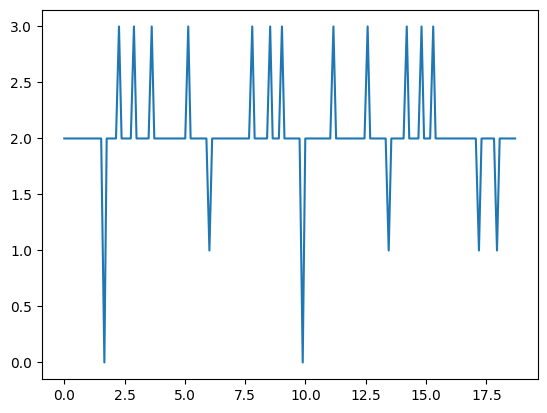

In [83]:
trials_df["Result"]
trials_df["Trial Start"]
plt.plot(trials_df["Trial Start"]/60000, trials_df["Result"])

# Neural Analysis

In [84]:
adaptation.pipelines.generate_rois_df?

Signature:
adaptation.pipelines.generate_rois_df(
    session_details,
    collections='',
    plane=0,
    stat='most_recent',
)
Docstring: <no docstring>
File:      c:\users\mohay\anaconda3\envs\analysis\lib\site-packages\researchprojects\adaptation\pipelines.py
Type:      function

In [10]:
Inflow.run_suite2p_gui(session_details = session)

LOAD_INFO  : run_suite2p_gui              : Opening GUI directly at stat file \\Mountcastle\lab\data\ONE\Adaptation\wm24\2022-08-22\001\suite2p\plane0\stat.npy
\\Mountcastle\lab\data\ONE\Adaptation\wm24\2022-08-22\001\suite2p\plane0\stat.npy
number of red cells: 2
time to draw and plot masks:  0.2849 sec


In [15]:
imaging_meta = Inflow.load.suite2p_metadata(session_details =  session)

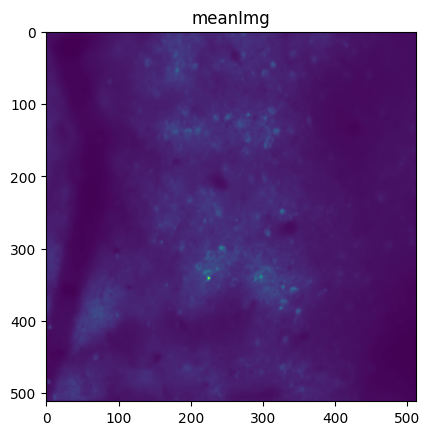

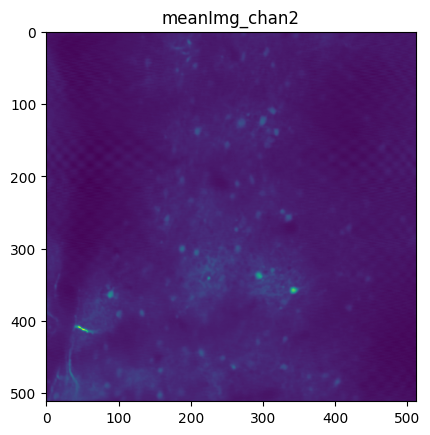

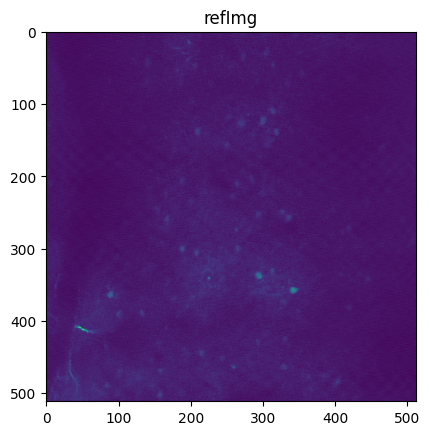

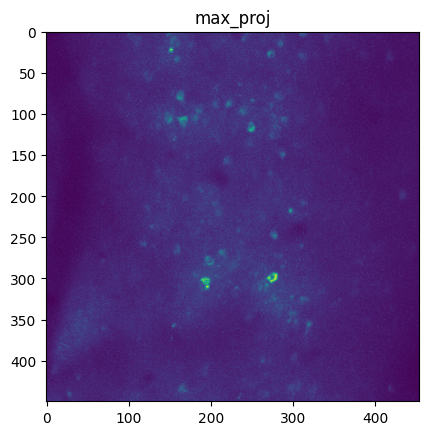

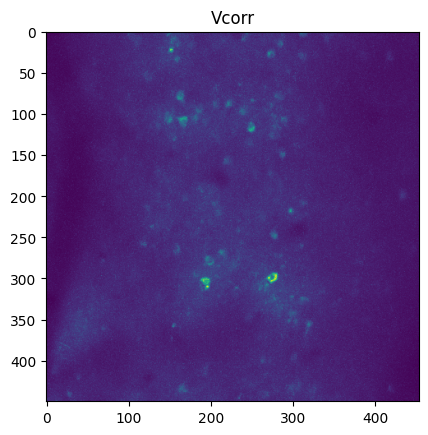

In [19]:
images_types = ["meanImg", "meanImg_chan2", "refImg", "max_proj", "Vcorr"]
for img_type in images_types :    
    plt.figure()
    plt.title(img_type)
    plt.imshow(imaging_meta[img_type])
    plt.show()


In [49]:
imaging_meta[key].shape

(150,)

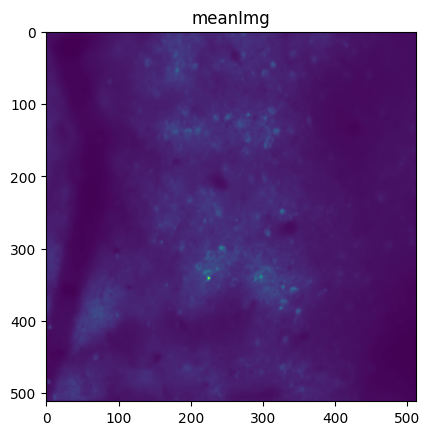

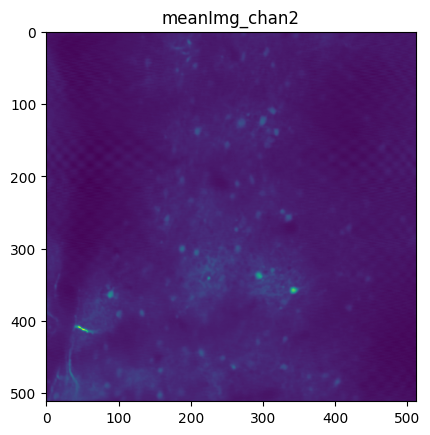

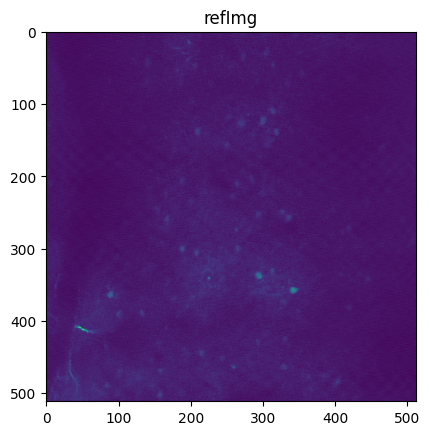

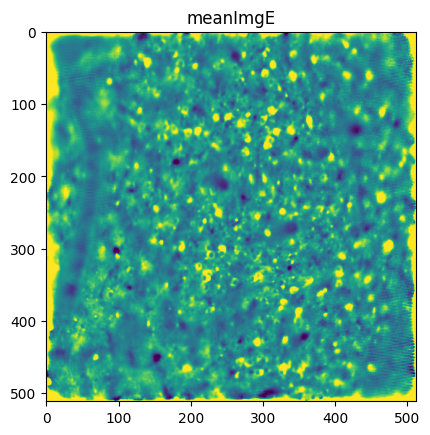

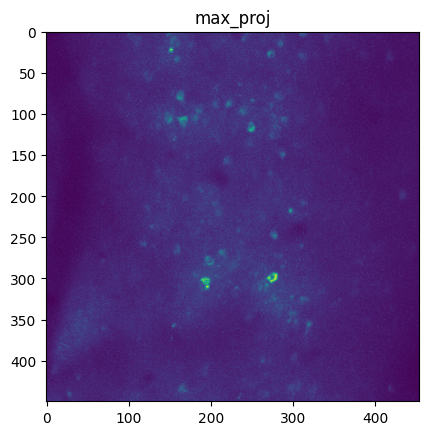

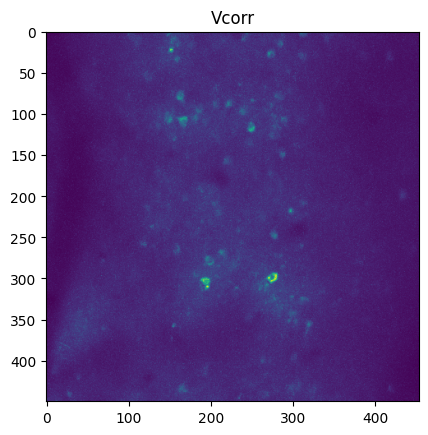

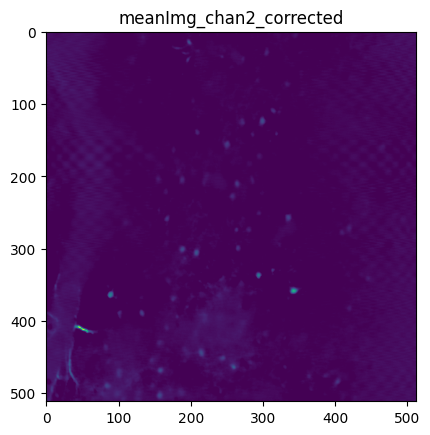

In [50]:
for key in imaging_meta.keys() :   
    try:
        if isinstance(imaging_meta[key], np.ndarray) :
            if len(imaging_meta[key].shape) == 2  :
                if imaging_meta[key].shape[0] < 50 or imaging_meta[key].shape[1] < 50:
                    continue
                plt.figure()
                plt.title(key)
                plt.imshow(imaging_meta[key])
                plt.show()
    except TypeError :
        pass

In [23]:
raise TypeError('this is my error')

TypeError: this is my error

In [20]:
imaging_meta.keys()


dict_keys(['suite2p_version', 'look_one_level_down', 'fast_disk', 'delete_bin', 'mesoscan', 'bruker', 'bruker_bidirectional', 'h5py', 'h5py_key', 'nwb_file', 'nwb_driver', 'nwb_series', 'save_path0', 'save_folder', 'subfolders', 'move_bin', 'nplanes', 'nchannels', 'functional_chan', 'tau', 'fs', 'force_sktiff', 'frames_include', 'multiplane_parallel', 'ignore_flyback', 'preclassify', 'save_mat', 'save_NWB', 'combined', 'aspect', 'do_bidiphase', 'bidiphase', 'bidi_corrected', 'do_registration', 'two_step_registration', 'keep_movie_raw', 'nimg_init', 'batch_size', 'maxregshift', 'align_by_chan', 'reg_tif', 'reg_tif_chan2', 'subpixel', 'smooth_sigma_time', 'smooth_sigma', 'th_badframes', 'norm_frames', 'force_refImg', 'pad_fft', 'nonrigid', 'block_size', 'snr_thresh', 'maxregshiftNR', '1Preg', 'spatial_hp', 'spatial_hp_reg', 'pre_smooth', 'spatial_taper', 'roidetect', 'spikedetect', 'sparse_mode', 'spatial_scale', 'connected', 'nbinned', 'max_iterations', 'threshold_scaling', 'max_overlap

In [12]:
dir(adaptation.pipelines)

['Inflow',
 'TiffReader',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'alias',
 'append_doc_and_signature_from',
 'copy_doc_and_signature_from',
 'generate_VGAT_labels',
 'generate_VGAT_values',
 'generate_barrel_label',
 'generate_fluomarker_average',
 'generate_neuropil_mask',
 'generate_neuropil_trials_arrays',
 'generate_neuropil_trials_arrays_mean',
 'generate_roi_signal_corrections',
 'generate_roi_stim_response_characteristics',
 'generate_rois_df',
 'generate_suite2p_ops',
 'generate_timelines_dict',
 'generate_trials_df',
 'generate_trials_roi_df',
 'get_labeling_thresholds',
 'get_local_logger',
 'hide_unused_kwargs',
 'load_preprocessing',
 'logging',
 'make_trials_stim_indices',
 'np',
 'os',
 'pd',
 'plots',
 'read_tdms',
 'refine_mask',
 'rough_neuropil_correction',
 'run_neuropil_map',
 'run_suite2p',
 'save_preprocessing',
 'select',
 'slow_trend_correction',
 'tiff_multi_read',
 'verify_suite2p_and_

In [85]:
adaptation.pipelines.generate_rois_df(session_details = session)

ypix   
roi#                                                      
0     [31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 3...  \
1     [41, 41, 41, 42, 42, 42, 42, 42, 42, 43, 43, 4...   
2     [50, 50, 50, 51, 51, 51, 51, 51, 51, 52, 52, 5...   
3     [53, 53, 53, 53, 53, 53, 54, 54, 54, 54, 54, 5...   
4     [56, 57, 57, 57, 57, 57, 57, 58, 58, 58, 58, 5...   
5     [61, 61, 61, 61, 62, 62, 62, 62, 62, 62, 63, 6...   
6     [102, 102, 102, 102, 103, 103, 103, 103, 103, ...   
7     [106, 106, 106, 106, 106, 107, 107, 107, 107, ...   
8     [113, 113, 113, 114, 114, 114, 114, 114, 114, ...   
9     [113, 113, 113, 113, 114, 114, 114, 114, 114, ...   
10    [121, 121, 121, 121, 121, 121, 122, 122, 122, ...   
11    [124, 125, 125, 125, 125, 126, 126, 126, 126, ...   
12    [128, 128, 128, 129, 129, 129, 129, 129, 130, ...   
13    [133, 134, 134, 134, 134, 134, 134, 134, 134, ...   
14    [135, 135, 135, 135, 136, 136, 136, 136, 136, ...   
15    [141, 141, 141, 141, 141, 142, 142, 142, 142, ...   
16    [177, 177, 177, 178, 178, 178, 178, 178, 178, ...   
17    [185, 185, 185, 185, 185, 186, 186, 186, 186, ...   
18    [226, 226, 226, 226, 226, 227, 227, 227, 227, ...   
19    [232, 233, 233, 234, 234, 234, 234, 235, 235, ...   
20    [245, 245, 245, 245, 245, 246, 246, 246, 246, ...   
21    [248, 248, 248, 248, 248, 249, 249, 249, 249, ...   
22    [266, 266, 266, 267, 267, 267, 267, 267, 268, ...   
23    [272, 272, 272, 273, 273, 273, 273, 273, 273, ...   
24    [296, 296, 296, 296, 296, 296, 297, 297, 297, ...   
25    [303, 303, 304, 304, 304, 304, 304, 304, 305, ...   
26    [324, 324, 324, 324, 324, 324, 324, 325, 325, ...   
27    [329, 330, 330, 330, 330, 330, 330, 330, 330, ...   
28    [353, 353, 353, 353, 353, 353, 354, 354, 354, ...   
29    [382, 382, 382, 382, 383, 383, 383, 383, 383, ...   
30    [385, 385, 386, 386, 386, 386, 386, 387, 387, ...   
31    [425, 425, 425, 425, 425, 426, 426, 426, 426, ...   
32    [427, 427, 427, 427, 428, 428, 428, 428, 428, ...   
33    [459, 459, 459, 459, 459, 460, 460, 460, 460, ...   
34    [468, 468, 469, 469, 469, 469, 469, 470, 470, ...   

                                                   xpix   
roi#                                                      
0     [336, 337, 338, 339, 340, 341, 342, 343, 344, ...  \
1     [313, 314, 315, 311, 312, 313, 314, 315, 316, ...   
2     [181, 182, 183, 179, 180, 181, 182, 183, 184, ...   
3     [300, 301, 302, 303, 304, 305, 299, 300, 301, ...   
4     [339, 336, 337, 338, 339, 340, 341, 335, 336, ...   
5     [187, 188, 189, 190, 186, 187, 188, 189, 190, ...   
6     [191, 192, 193, 194, 189, 190, 191, 192, 193, ...   
7     [308, 309, 310, 311, 312, 307, 308, 309, 310, ...   
8     [252, 253, 254, 250, 251, 252, 253, 254, 255, ...   
9     [278, 279, 280, 281, 277, 278, 279, 280, 281, ...   
10    [213, 214, 215, 216, 217, 218, 212, 213, 214, ...   
11    [267, 266, 267, 268, 269, 265, 266, 267, 268, ...   
12    [175, 176, 177, 174, 175, 176, 177, 178, 174, ...   
13    [196, 191, 192, 193, 194, 195, 196, 197, 198, ...   
14    [317, 318, 320, 321, 317, 318, 319, 320, 321, ...   
15    [276, 277, 278, 279, 280, 275, 276, 277, 278, ...   
16    [315, 316, 317, 314, 315, 316, 317, 318, 319, ...   
17    [246, 247, 248, 249, 250, 245, 246, 247, 248, ...   
18    [461, 462, 463, 464, 465, 460, 461, 462, 463, ...   
19    [195, 195, 196, 195, 196, 197, 199, 195, 196, ...   
20    [325, 326, 327, 328, 329, 324, 325, 326, 327, ...   
21    [236, 237, 238, 239, 240, 234, 235, 236, 237, ...   
22    [157, 158, 159, 156, 157, 158, 159, 160, 155, ...   
23    [305, 306, 307, 303, 304, 305, 306, 307, 308, ...   
24    [240, 241, 242, 243, 244, 245, 239, 240, 241, ...   
25    [226, 227, 223, 224, 225, 226, 227, 228, 223, ...   
26    [304, 305, 306, 307, 308, 309, 310, 302, 303, ...   
27    [223, 219, 220, 221, 222, 223, 224, 225, 226, ...   
28    [340, 341, 342, 343, 344, 345, 338, 339, 340, ...   
29    [347, 348, 349, 350, 345, 346, 3

# Mess

In [22]:
pd.DataFrame()


Empty DataFrame
Columns: []
Index: []

In [44]:
series = sessions.iloc[0]

AttributeError: 'tuple' object has no attribute 'iloc'

In [50]:
series.url

'http://157.99.138.172/sessions/b3112faa-a0f1-4bbb-b552-b6ca8d6dfc7f'

In [43]:
sessions.iloc[0].name

AttributeError: 'tuple' object has no attribute 'iloc'

In [52]:
files = connector.list_datasets(eid = sessions.iloc[0].name, filename = 'imaging*')

In [53]:
files[0]

'\\\\Mountcastle\\lab\\data\\ONE\\Adaptation\\wm26\\2023-01-31\\002\\imaging_data\\imaging.frames.00001.tif'

In [54]:
array = Inflow.tiff.read(files[0], what='data', channel = 'green')

In [55]:
array.shape

(261, 512, 512)

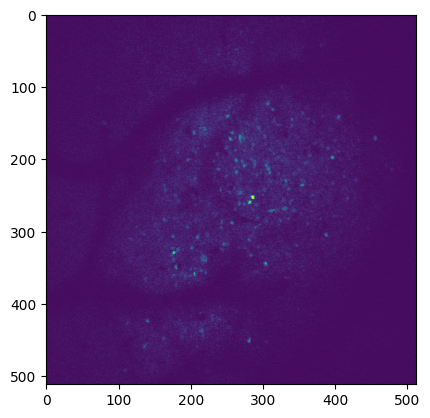

In [56]:
plt.imshow(array[0])